In [1]:
#import matplotlib; matplotlib.use('PDF')
import sys
# sys.path.append('/Users/alexandraamon/Desktop/Projects/Y3KP/2point')
import twopoint as tp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import pickle as pl
from astropy.io import fits
import yaml
from matplotlib import ticker
import configparser

In [2]:
maindir='/global/homes/m/myamamot/DES/'
infile_mdet = maindir+'y6-cosmicshear/y6_cosmicshear/data/y6_mdetV5_blindcat_BLINDED.fits' 
infile_bfd = maindir+'y6-cosmicshear/y6_cosmicshear/data/y6_bfdV2_blindcat_BLINDED.fits' 
infile_bfd_marco = '/global/cfs/cdirs/des/giannini/y6-3x2pt/blinding/data_vectors/2pt_y3dv_y6_cs_ggl_maglim_bfd__2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate_nosourcesreals_sompzmean_BLINDED.fits'
scfile=maindir+'y6-3x2pt-methods/y6_fiducial/scale_cuts/scales_1x2pt_minDMO_maxBM8_EE2_maxbin_chi2_3.25_cov1.45.ini'
covfile = maindir+'y6-3x2pt-methods/covariance/covmat_and_plots/desy3-cosmology/cov_simy6_l-desy3-1x2pt-cNG-mask'
savedir = maindir+'des-y6-analysis/cosmicshear_figures/'

In [23]:
def get_mean(zmeans, hists):
    means = np.zeros(4)
    sigmas = np.zeros(4)
    
    plt.figure(figsize=(12,6))
    bins=['BIN1','BIN2','BIN3','BIN4']
    for i in range(4):
        means[i] = np.sum(hists[bins[i]]*zmeans)/np.sum(hists[bins[i]])        
    return means



In [24]:
nbins = 4

dat0 = fits.open(infile)
dat1 = fits.open(newfile)
dat2 = fits.open(pubfile)

nz=dat1['nz_source'].data
nz_means = np.zeros((nbins))
nznorm = np.zeros((nbins,len(nz)))

for ibin in range(nbins):
    zmid = nz['Z_MID']
    nznorm[ibin,:]=nz['BIN%d'%(ibin+1)]/np.sum(nz['BIN%d'%(ibin+1)]) #normalise
    nz_means[ibin] = np.sum(nznorm*zmid)

meannz0=get_mean(dat0['nz_source'].data['Z_MID'], dat0['nz_source'].data)
print(meannz0)
meannz1=get_mean(dat1['nz_source'].data['Z_MID'], dat1['nz_source'].data)
print(meannz1)
meannz2=get_mean(dat2['nz_source'].data['Z_MID'], dat2['nz_source'].data)
print(meannz2)

[0.33752943 0.52349895 0.7439267  0.95192637]
[0.33752943 0.52349895 0.7439267  0.95192637]
[0.33630471 0.52141391 0.7412394  0.93577706]


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

(0, 0.038)

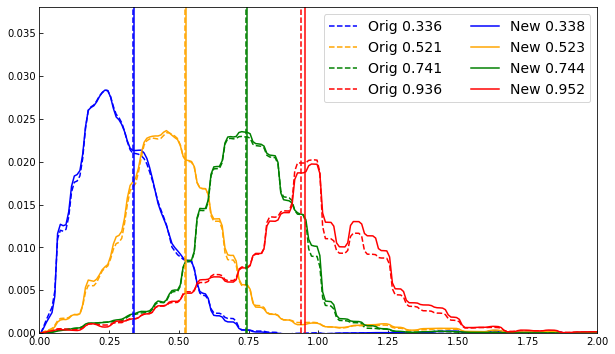

In [20]:
plt.figure(figsize=(10,6))

plt.plot(dat0['nz_source'].data['Z_MID'],dat0['nz_source'].data['BIN1'],color='blue',ls='--',label='Orig %.3f'%(meannz0[0]))
plt.plot(dat0['nz_source'].data['Z_MID'],dat0['nz_source'].data['BIN2'],color='orange',ls='--',label='Orig %.3f'%(meannz0[1]))
plt.plot(dat0['nz_source'].data['Z_MID'],dat0['nz_source'].data['BIN3'],color='green',ls='--',label='Orig %.3f'%(meannz0[2]))
plt.plot(dat0['nz_source'].data['Z_MID'],dat0['nz_source'].data['BIN4'],color='red',ls='--',label='Orig %.3f'%(meannz0[3]))

'''plt.plot(dat1['nz_source'].data['Z_MID'],dat1['nz_source'].data['BIN1'],color='blue',ls='-',label='New')
plt.plot(dat1['nz_source'].data['Z_MID'],dat1['nz_source'].data['BIN2'],color='orange',ls='-')
plt.plot(dat1['nz_source'].data['Z_MID'],dat1['nz_source'].data['BIN3'],color='green',ls='-')
plt.plot(dat1['nz_source'].data['Z_MID'],dat1['nz_source'].data['BIN4'],color='red',ls='-')
'''
plt.plot(dat1['nz_source'].data['Z_MID'],nznorm[0,:],color='blue',ls='-',label='New %.3f'%(meannz1[0]))
plt.plot(dat1['nz_source'].data['Z_MID'],nznorm[1,:],color='orange',ls='-',label='New %.3f'%(meannz1[1]))
plt.plot(dat1['nz_source'].data['Z_MID'],nznorm[2,:],color='green',ls='-',label='New %.3f'%(meannz1[2]))
plt.plot(dat1['nz_source'].data['Z_MID'],nznorm[3,:],color='red',ls='-',label='New %.3f'%(meannz1[3]))

c=['blue','orange','green','red']
for i in range(nbins):
    plt.axvline(x=meannz0[i],ls='--',color=c[i])
    plt.axvline(x=meannz1[i],ls='-',color=c[i])

plt.legend(fontsize=14,ncol=2)
plt.xlim((0,2))
plt.ylim((0,0.038))

In [8]:
log=False
matplotlib.rcParams["xtick.direction"]='in'
matplotlib.rcParams["ytick.direction"]='in'

def fake_theory(xi):
    return savgol_filter(xi, 11, 2)



def get_angle_range(xi,j,i):
    config = configparser.ConfigParser()
    config.read(scfile)
    scales = config['2pt_like']

    if xi == 'xip':
        name = 'angle_range_xip_'+str(j)+'_'+str(i)
    else:
        name = 'angle_range_xim_'+str(j)+'_'+str(i)
    return np.array(scales[name].split()).astype(float)

def get_angle_range_agg(xi,j,i):
    config = configparser.ConfigParser()
    config.read(scfile)
    scales = config['2pt_like']
    if xi == 'xip':
        name = 'angle_range_xip_'+str(j)+'_'+str(i)
    else:
        name = 'angle_range_xim_'+str(j)+'_'+str(i)
        #print(name, str(j), str(i), np.array(scales[name].split()).astype(float))
    return np.array(scales[name].split()).astype(float)


def get_params(xi,theta):
    if xi == 'xip' or xi == 'xim':
        #lims = [(-0.5,4.4),(0.,4.4),(0.,4.4),(0.,4.4)]#[(-0.4,1.2),(-0.4,1.6),(-0.6,3.),(-0.6,4.45)]
        lims = [(-0.5,4.5),(-0.5,4.5),(-0.5,4.5),(-0.5,4.5)]#[(-0.4,1.2),(-0.4,1.6),(-0.6,3.),(-0.6,4.45)]


        dlims = [(-1.5,1.5) for i in range(4)]
        tmult = theta
        dmult = 1e4
        dmult2 = 1e4
        lx = [0.05, 0.93]
    return lims, dlims,tmult,dmult,dmult2,lx

def set_axes(name,ax,dxi=False):
    if not dxi:
        if (name=='xim')&(i==1):
            plt.xlabel(r'$\theta$ (arcmin)')
        else:
            ax.set_xticklabels([])
        if i!=1:
            ax.set_yticklabels([])
        if (i==1)&(j==1):
            if name == 'xip':
                print("123")
                # plt.ylabel(r'$   10^{4}\theta\xi_{+}    $', labelpad=15)                
                x,y = ax.yaxis.label.get_position()
                print(x,y)
                ax.yaxis.set_label_coords(x-.2, y)#-0.5
        if (i==1)&(j==4):
            if name == 'xim':
                # plt.ylabel(r'$   10^{4}\theta\xi_{-}     $')
                x,y = ax.yaxis.label.get_position()
                ax.yaxis.set_label_coords(x+1.2, y)#+0.5
                ax.yaxis.set_label_position("right")
    else:
        if (name=='xim')&(j==4): #&(j==4):
            print(name,i,j)
            plt.xlabel(r'$\theta$ (arcmin)')
        elif (name=='xip')&(i==1)&(j==1):
            print(name,i,j)
            plt.xlabel(r'$\theta$ (arcmin)')
        if (name=='xim')&(j<3):
            ax.set_xticklabels([])
        if (name=='xip')&(j!=1):
        #else:
            ax.set_xticklabels([])
        
        if (name=='xip')&(i==1):
            print("yes!")
            #ax.set_yticklabels([])
        elif (name=='xim')&(i==1):
            print("yes!")
        else:
            ax.set_yticklabels([])
            
        if (i==1)&(j==1):
            if name == 'xip':
                print("Abc")
                plt.ylabel(r'$\delta\xi_{+}/\xi_{+}      $')
                x,y = ax.yaxis.label.get_position()
                ax.yaxis.set_label_coords(x-.2, y)#-0.5
        if (i==1)&(j==4):
            if name == 'xim':
                plt.ylabel(r'$\delta\xi_{-}/\xi_{-}      $')
                x,y = ax.yaxis.label.get_position()
                ax.yaxis.set_label_coords(x+1.2, y)#+0.5
                ax.yaxis.set_label_position("right")

                
                
def get_axes(name,i,j,rows,cols,dxi=False):
    if not dxi:
        if name == 'xip':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(3-(j-1)),i-1),rowspan=2)
        elif name=='xim':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(j-1),6-i),rowspan=2)
    else:
        if name == 'xip':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(3-(j-1))+2,i-1))
        elif name=='xim':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(j-1)+2,6-i))
    return ax




123
0 0.5
xip 1 1
yes!
Abc
yes!
yes!
yes!
yes!
yes!
yes!
xim 1 4
yes!
xim 2 4
xim 3 4
xim 4 4


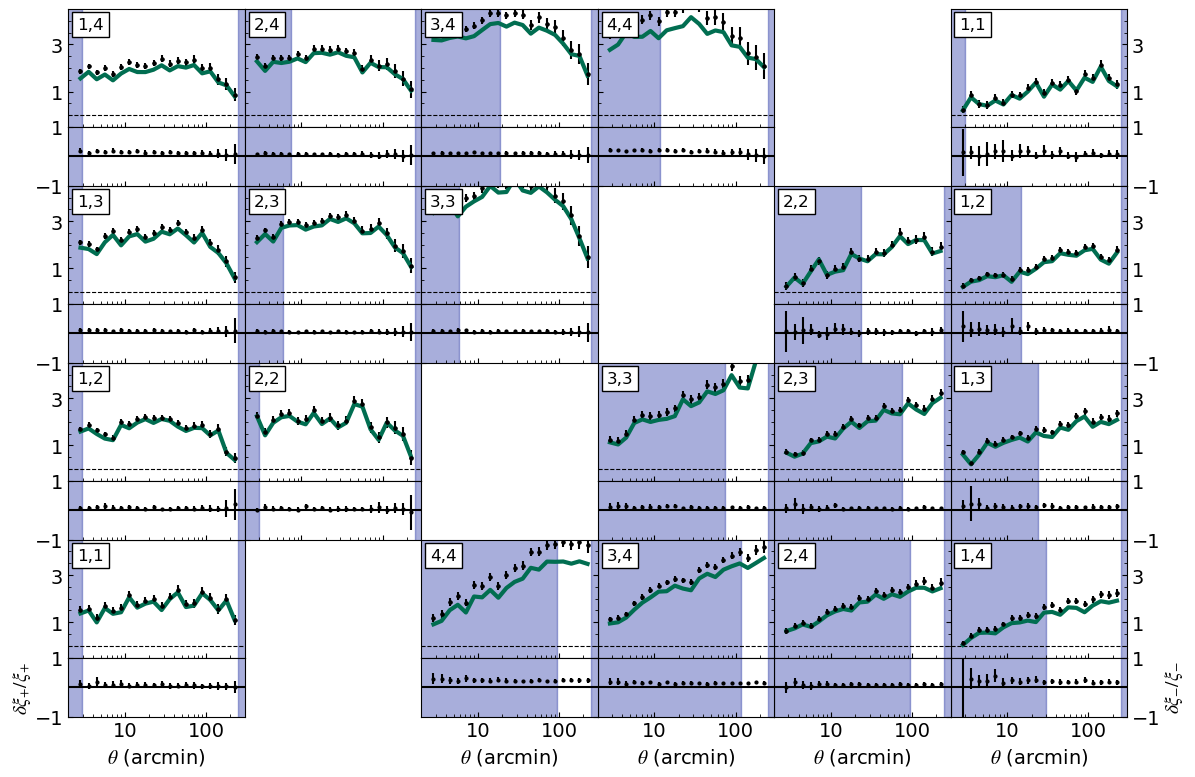

In [9]:
def plot_panel(name,i,j,rows,cols,theta,xi,err,ttheta,txi,y1error,notomo=False):
    lims, dlims,tmult,dmult,dmult2,lx = get_params(name,theta)
    ax = get_axes(name,i,j,rows,cols)
    tmin,tmax = get_angle_range(name,i,j)
    tmin2,tmax2 = get_angle_range_agg(name,i,j)
    ax.axhline(y=0,ls='--',color='k',lw=0.8)

    from matplotlib.ticker import ScalarFormatter
    for axis in [ax.xaxis, ax.yaxis]:
        formatter = ScalarFormatter()
        formatter.set_scientific(False)
        axis.set_major_formatter(formatter)
    ax.plot(ttheta,tmult*txi*dmult,ls='-',color = '#016e51',linewidth=3.)
    ax.errorbar(theta,tmult*xi*dmult,yerr=err*tmult*dmult,ls='',marker='.',color = 'k')
    ax.plot(theta,tmult*xi*dmult,ls='',marker='.',color = 'k')
    ax.set_rasterization_zorder(0)
    if txi is None:
        print('faking theory')
        txi = fake_theory(xi)

    plt.ylim(lims[j-1])
    plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-1)
    plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-2)
    plt.fill_between([0.,tmin2],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-3)
    plt.fill_between([tmax2,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-4)
    props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    ax.text(lx[0], lx[1], str(i)+','+str(j), transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    plt.xlim((2,300))
    #plt.ticklabel_format(axis='x',style='plain',useOffset=False)    
    set_axes(name,ax,)
    plt.yticks((1.0,3.0))
    plt.xscale('log')
    ax.set_xlabel('')
    #ax.ticklabel_format(style='plain')
    plt.minorticks_on()
    if name == 'xim':
        ax.yaxis.tick_right()
    #ax.spines[axis].set_linewidth(0.5)
    
    ax = get_axes(name,i,j,rows,cols,dxi=True)
    tmin,tmax = get_angle_range(name,i,j)
    ax.axhline(y=0,ls='-',color='k')
    ax.errorbar(theta,(xi-txi)/txi,yerr=err/txi,ls='',marker='.',color = 'k')
    ax.set_rasterization_zorder(0)
    plt.ylim(-1.0,1.0)
    plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-1)
    plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-2)
    plt.fill_between([0.,tmin2],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-3)
    plt.fill_between([tmax2,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-4)
    #props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    #ax.text(0.03, 0.93, str(i)+','+str(j), transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    plt.xlim((2,300))
    plt.yticks((-1.0,1.0))
    plt.xscale('log')
    # plt.yscale('symlog',linthreshy=.01,linscale=0.01)
    from matplotlib.ticker import FuncFormatter
    x=theta
    formatter = FuncFormatter(lambda x, _: '{:.16g}'.format(x)) # https://stackoverflow.com/a/49306588/3904031
    ax.xaxis.set_major_formatter(formatter)
    set_axes(name,ax,dxi=True)
    #plt.minorticks_on()
    if name == 'xim':
        ax.yaxis.tick_right()
        
#PLOT DATA VECTOR
matplotlib.rcParams.update({'font.size': 14, 'legend.fontsize':'small', 'lines.markersize': 4, 'axes.labelsize': 14, "text.usetex": False, "font.family": "serif", "font.serif": ["Times New Roman"]})
plt.figure(figsize=(12,8))

fits   = infile_bfd
tfits  =  infile_bfd_marco
y1fits = infile_bfd_marco

xip_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xip')
xim_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xim')
txip_   = tp.TwoPointFile.from_fits(tfits,covmat_name=None).get_spectrum('xip')
txim_   = tp.TwoPointFile.from_fits(tfits,covmat_name=None).get_spectrum('xim')
y1_xip  = tp.TwoPointFile.from_fits(y1fits).get_spectrum('xip')
y1_xim  = tp.TwoPointFile.from_fits(y1fits).get_spectrum('xim')
pairs  = xip_.bin_pairs
rowcols = np.max(xip_.bin2)
#print(rowcols)

for k,(i,j) in enumerate(pairs):
    theta  = xip_.get_pair(i,j)[0]
    xip    = xip_.get_pair(i,j)[1]
    xim    = xim_.get_pair(i,j)[1]
    xiperr = xip_.get_error(i,j)
    ximerr = xim_.get_error(i,j)
    txip    = txip_.get_pair(i,j)[1]
    txim    = txim_.get_pair(i,j)[1]
    y1xiperror = y1_xip.get_error(i,j)
    y1ximerror = y1_xim.get_error(i,j)

    plot_panel('xip',i,j,rowcols,rowcols,theta,xip,xiperr,theta,txip,y1xiperror,notomo=False)
    plot_panel('xim',i,j,rowcols,rowcols,theta,xim,ximerr,theta,txim,y1ximerror,notomo=False)

plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)
# plt.savefig(dir+'DVcomp.pdf', dpi=150,bbox_inches='tight')
plt.show()
plt.close()

In [70]:
def plot_simpanel(name,i,j,rows,cols,theta,xi,err,ttheta,txi,txi_c30,notomo=False):
    lims, dlims,tmult,dmult,dmult2,lx = get_params(name,theta)

    ax = get_axes(name,i,j,rows,cols,dxi=True)
    tmin,tmax = get_angle_range(name,i,j)
    tmin2,tmax2 = get_angle_range_agg(name,i,j)
    ax.set_rasterization_zorder(0)
    plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-1)
    plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-2)
    plt.fill_between([0.,tmin2],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-3)
    plt.fill_between([tmax2,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-4)
    ax.axhline(y=0,ls='-',color='k')
    
    ax.plot(theta,(xi-txi_c30)/(xi),ls='-',color = '#12239e',linewidth=2., label=r'C')
    
    plt.ylim((-0.6,0.6))
    plt.yticks((-0.4,.4))
        
    if (i==1)&(j==1):
        if name == 'xip':               
            x,y = ax.yaxis.label.get_position()
            ax.yaxis.set_label_coords(x-0.1, y)#-0.5
            plt.ylabel(r'$\delta\xi_+/\xi_+}$', fontsize=10)
    if (i==1)&(j==4):
        if name == 'xim':
            x,y = ax.yaxis.label.get_position()
            ax.yaxis.set_label_coords(x+0.1, y)#+0.5
            ax.yaxis.set_label_position("right")
            plt.ylabel(r'$\delta\xi_-/\xi_-$', fontsize=10)
    if (name=='xim')&(j==4):
        print(name,i,j)
        plt.xlabel(r'$\theta$ (arcmin)', fontsize=18)
    elif (name=='xip')&(i==1)&(j==1):
        print(name,i,j)
        plt.xlabel(r'$\theta$ (arcmin)', fontsize=18)
    plt.xlim((2,300))
    plt.xticks((10,100))
    plt.xscale('log')
    from matplotlib.ticker import FuncFormatter
    x=theta
    formatter = FuncFormatter(lambda x, _: '{:.16g}'.format(x)) # https://stackoverflow.com/a/49306588/3904031
    ax.xaxis.set_major_formatter(formatter)
    set_axes(name,ax,dxi=True)
    

    if (name=='xip')&(j!=1):
        ax.set_xticklabels([])
    if (name=='xip')&(i!=1):
        ax.set_yticklabels([])
    if (name=='xim')&(i==1):
        print("yes!")
    #else:
        #ax.set_yticklabels([])

    plt.minorticks_on()
    if name == 'xim':
        ax.yaxis.tick_right()

    props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    #ax.text(0.03, 0.93, str(i)+','+str(j), transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    

    props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    ax.text(lx[0], lx[1], str(i)+','+str(j), transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

    if (i==4) & (j==4) & (name=="xip"):
        print("here")
        #ax.legend(*ax.get_legend_handles_labels(),ncol=4, bbox_to_anchor=(-2.,1.34),loc='upper left', fontsize=14)  ##AC
 
                
def get_axes(name,i,j,rows,cols,dxi=False):
    if name == 'xip':
        ax = plt.subplot2grid((cols,rows+2), ((3-(j-1)),i-1))
    elif name=='xim':
        ax = plt.subplot2grid(( cols,rows+2), ((j-1),6-i))
    return ax

4
('xip', 1, 1)
('xip', 1, 1)
yes!
Abc
yes!
yes!
yes!
yes!
yes!
yes!
yes!
yes!


/Users/alexandraamon/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()
/Users/alexandraamon/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


yes!
('xim', 1, 4)
('xim', 1, 4)
yes!
yes!
('xim', 2, 4)
('xim', 2, 4)
('xim', 3, 4)
('xim', 3, 4)
here
('xim', 4, 4)
('xim', 4, 4)


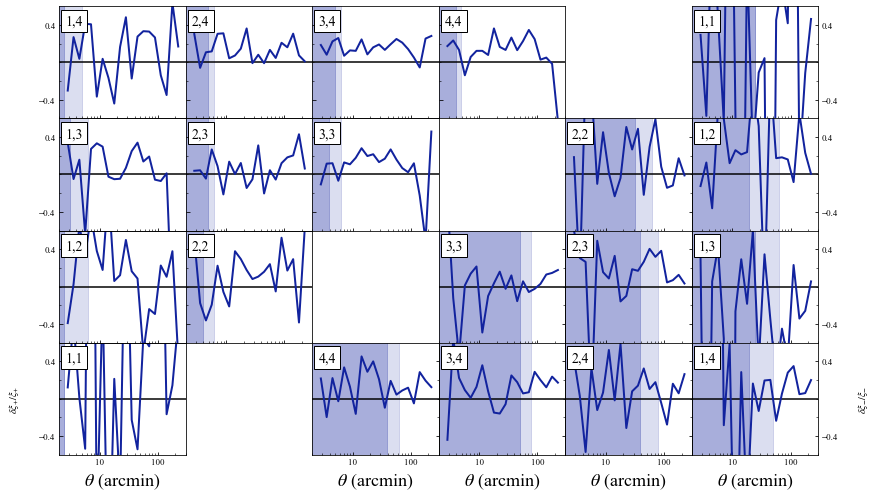

In [71]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": "9",
    "font.serif": ["Times New Roman"],
})

#plt.figure(figsize=(12,5))
plt.figure(figsize=(12,7))
fits   = infile
tfits  = infile #'/global/cscratch1/sd/aamon/DES/y3-3x2pt/data/simulated-des-y3/sim_3x2pt_bestfit_cosmo_IA_bias_11_13_20_cov_nz.fits' #"/global/cscratch1/sd/aamon/2pt_NG_mcal_1110.fits" #'test_xi_mcal/data_vector/2pt_theory.txt'#'xi_mcal.fits'
t2fits = newfile

xip_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xip')
xim_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xim')
txip_   = tp.TwoPointFile.from_fits(tfits,covmat_name=None).get_spectrum('xip')
txim_   = tp.TwoPointFile.from_fits(tfits,covmat_name=None).get_spectrum('xim')
txip2_ = tp.TwoPointFile.from_fits(t2fits).get_spectrum('xip')
txim2_   = tp.TwoPointFile.from_fits(t2fits).get_spectrum('xim')

pairs  = xip_.bin_pairs
rowcols = np.max(xip_.bin2)
print(rowcols)

for k,(i,j) in enumerate(pairs):
    theta  = xip_.get_pair(i,j)[0]
    xip    = xip_.get_pair(i,j)[1]
    xim    = xim_.get_pair(i,j)[1]
    xiperr = xip_.get_error(i,j)
    ximerr = xim_.get_error(i,j)
    ###txip    = np.loadtxt(tfits)[k*20:(k+1)*20]
    ###txim    = np.loadtxt(tfits)[k*20+200:(k+1)*20+200]
    # ttheta  = txip_.get_pair(i,j)[0]
    txip    = txip_.get_pair(i,j)[1]
    txim    = txim_.get_pair(i,j)[1]
    txip_C30    = txip2_.get_pair(i,j)[1]
    txim_C30    = txim2_.get_pair(i,j)[1] 
    
    plot_simpanel('xip',i,j,rowcols,rowcols,theta,xip,xiperr,theta,txip,txip_C30,notomo=False)
    plot_simpanel('xim',i,j,rowcols,rowcols,theta,xim,ximerr,theta,txim,txim_C30,notomo=False)
plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)
plt.show()
plt.close()

In [40]:
def set_axes(name,ax,dxi=False):
    if not dxi:
        if (name=='xim')&(i==1):
            plt.xlabel(r'$\theta$ (arcmin)')
        else:
            ax.set_xticklabels([])
        if i!=1:
            ax.set_yticklabels([])
        if (i==1)&(j==1):
            if name == 'xip':
                print("123")
                plt.ylabel(r'$   10^{4}\theta\xi_{+}    $', labelpad=15)                
                x,y = ax.yaxis.label.get_position()
                print(x,y)
                ax.yaxis.set_label_coords(x-.2, y)#-0.5
        if (i==1)&(j==4):
            if name == 'xim':
                plt.ylabel(r'$   10^{4}\theta\xi_{-}     $')
                x,y = ax.yaxis.label.get_position()
                ax.yaxis.set_label_coords(x+1.2, y)#+0.5
                ax.yaxis.set_label_position("right")
    else:
        if (name=='xim')&(j==4): #&(j==4):
            print(name,i,j)
            plt.xlabel(r'$\theta$ (arcmin)')
        elif (name=='xip')&(i==1)&(j==1):
            print(name,i,j)
            plt.xlabel(r'$\theta$ (arcmin)')
        if (name=='xim')&(j<3):
            ax.set_xticklabels([])
        if (name=='xip')&(j!=1):
        #else:
            ax.set_xticklabels([])
        
        if (name=='xip')&(i==1):
            print("yes!")
            #ax.set_yticklabels([])
        elif (name=='xim')&(i==1):
            print("yes!")
        else:
            ax.set_yticklabels([])
            
        if (i==1)&(j==1):
            if name == 'xip':
                print("Abc")
                plt.ylabel(r'$\sigma_{new}/\sigma_{old}$', fontsize=22)
                #plt.ylabel(r'$\delta\xi_{+}/\sigma_{+}$')#r'$10^{4}\Delta\xi_{+}$')                
                x,y = ax.yaxis.label.get_position()
                ax.yaxis.set_label_coords(x-.2, y)#-0.5
        if (i==1)&(j==4):
            if name == 'xim':
                plt.ylabel(r'$\sigma_{new}/\sigma_{old}$', fontsize=22)
                #plt.ylabel(r'$\delta\xi_{-}/\sigma_{-}$')#r'$10^{4}\Delta\xi_{-}$')
                x,y = ax.yaxis.label.get_position()
                ax.yaxis.set_label_coords(x+1.2, y)#+0.5
                ax.yaxis.set_label_position("right")
                #ax.set_yticks((-1.0,1.0))



4
('xip', 1, 1)
('xip', 1, 1)
yes!
Abc
yes!
yes!
yes!
yes!
yes!
yes!
yes!
yes!


/Users/alexandraamon/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()
/Users/alexandraamon/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


yes!
('xim', 1, 4)
('xim', 1, 4)
yes!
yes!
('xim', 2, 4)
('xim', 2, 4)
('xim', 3, 4)
('xim', 3, 4)
here
('xim', 4, 4)
('xim', 4, 4)


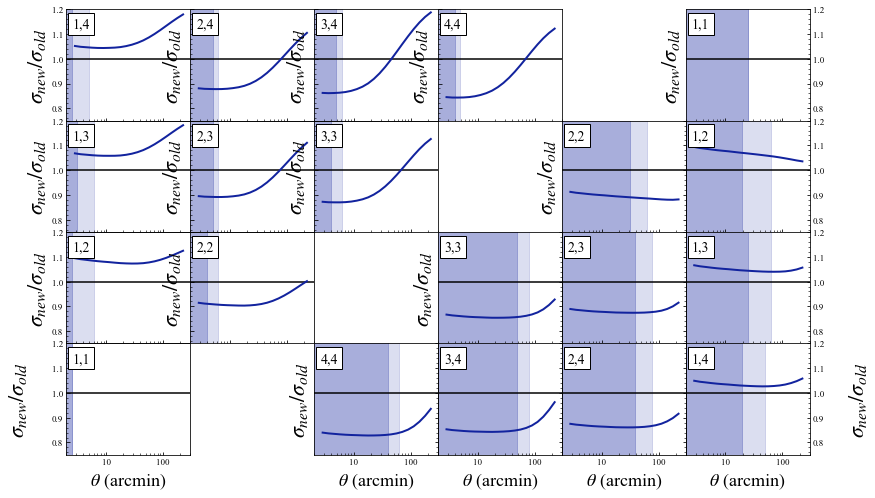

In [73]:
def plot_simpanel(name,i,j,rows,cols,theta,xi,err,ttheta,txi,txi_c30,err2_c30,notomo=False):
    lims, dlims,tmult,dmult,dmult2,lx = get_params(name,theta)

    ax = get_axes(name,i,j,rows,cols,dxi=True)
    tmin,tmax = get_angle_range(name,i,j)
    tmin2,tmax2 = get_angle_range_agg(name,i,j)
    ax.set_rasterization_zorder(0)
    #plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.2)
    #plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.2)
    plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-1)
    plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-2)
    plt.fill_between([0.,tmin2],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-3)
    plt.fill_between([tmax2,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-4)
    ax.axhline(y=1,ls='-',color='k')
    #plt.ylabel(r'$\sigma_{new}/\sigma_{old}$', fontsize=22)
    #ax.plot(theta,(xi-txi_c30)/(xi),ls='-',color = '#12239e',linewidth=2., label=r'C')
    ax.plot(theta,(err2_c30)/(err),ls='-',color = '#12239e',linewidth=2., label=r'C')
    
    plt.ylim((0.75,1.2))
    #plt.yticks((-0.4,.4))
        
    if (i==1)&(j==1):
        if name == 'xip':               
            x,y = ax.yaxis.label.get_position()
            ax.yaxis.set_label_coords(x-0.1, y)#-0.5
            plt.ylabel(r'$\sigma_{new}/\sigma_{old}$', fontsize=22)
    if (i==1)&(j==4):
        if name == 'xim':
            x,y = ax.yaxis.label.get_position()
            ax.yaxis.set_label_coords(x+0.1, y)#+0.5
            ax.yaxis.set_label_position("right")
            plt.ylabel(r'$\sigma_{new}/\sigma_{old}$', fontsize=22)
    if (name=='xim')&(j==4):
        print(name,i,j)
        plt.xlabel(r'$\theta$ (arcmin)', fontsize=18)
    elif (name=='xip')&(i==1)&(j==1):
        print(name,i,j)
        plt.xlabel(r'$\theta$ (arcmin)', fontsize=18)
    plt.xlim((2,300))
    plt.xticks((10,100))
    plt.xscale('log')
    from matplotlib.ticker import FuncFormatter
    x=theta
    formatter = FuncFormatter(lambda x, _: '{:.16g}'.format(x)) # https://stackoverflow.com/a/49306588/3904031
    ax.xaxis.set_major_formatter(formatter)
    set_axes(name,ax,dxi=True)
    plt.ylabel(r'$\sigma_{new}/\sigma_{old}$', fontsize=22)
    

    if (name=='xip')&(j!=1):
        ax.set_xticklabels([])
    if (name=='xip')&(i!=1):
        ax.set_yticklabels([])
    if (name=='xim')&(i==1):
        print("yes!")

    plt.minorticks_on()
    if name == 'xim':
        ax.yaxis.tick_right()

    props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)

    props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    ax.text(lx[0], lx[1], str(i)+','+str(j), transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

    if (i==4) & (j==4) & (name=="xip"):
        print("here")
        #ax.legend(*ax.get_legend_handles_labels(),ncol=4, bbox_to_anchor=(-2.,1.34),loc='upper left', fontsize=14)  ##AC
 
                
def get_axes(name,i,j,rows,cols,dxi=False):
    if name == 'xip':
        ax = plt.subplot2grid((cols,rows+2), ((3-(j-1)),i-1))
    elif name=='xim':
        ax = plt.subplot2grid(( cols,rows+2), ((j-1),6-i))
    return ax


plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
})

#plt.figure(figsize=(12,5))
plt.figure(figsize=(12,7))
fits   = infile
tfits  = infile #'/global/cscratch1/sd/aamon/DES/y3-3x2pt/data/simulated-des-y3/sim_3x2pt_bestfit_cosmo_IA_bias_11_13_20_cov_nz.fits' #"/global/cscratch1/sd/aamon/2pt_NG_mcal_1110.fits" #'test_xi_mcal/data_vector/2pt_theory.txt'#'xi_mcal.fits'
t2fits = newfile
xip_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xip')
xim_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xim')
txip_   = tp.TwoPointFile.from_fits(tfits,covmat_name=None).get_spectrum('xip')
txim_   = tp.TwoPointFile.from_fits(tfits,covmat_name=None).get_spectrum('xim')
txip2_ = tp.TwoPointFile.from_fits(t2fits).get_spectrum('xip')
txim2_   = tp.TwoPointFile.from_fits(t2fits).get_spectrum('xim')

pairs  = xip_.bin_pairs
rowcols = np.max(xip_.bin2)
print(rowcols)

for k,(i,j) in enumerate(pairs):
    theta  = xip_.get_pair(i,j)[0]
    xip    = xip_.get_pair(i,j)[1]
    xim    = xim_.get_pair(i,j)[1]
    xiperr = xip_.get_error(i,j)
    ximerr = xim_.get_error(i,j)
    ###txip    = np.loadtxt(tfits)[k*20:(k+1)*20]
    ###txim    = np.loadtxt(tfits)[k*20+200:(k+1)*20+200]
    # ttheta  = txip_.get_pair(i,j)[0]
    txip    = txip_.get_pair(i,j)[1]
    txim    = txim_.get_pair(i,j)[1]
    txip_C30    = txip2_.get_pair(i,j)[1]
    txim_C30    = txim2_.get_pair(i,j)[1] 
    xiperr2 = txip2_.get_error(i,j)
    ximerr2 = txim2_.get_error(i,j)
    plot_simpanel('xip',i,j,rowcols,rowcols,theta,xip,xiperr,theta,txip,txip_C30,xiperr2,notomo=False)
    plot_simpanel('xim',i,j,rowcols,rowcols,theta,xim,ximerr,theta,txim,txim_C30,ximerr2,notomo=False)
plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)
plt.show()
plt.close()